Importing the required libraries

In [16]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn import metrics

Loading the dataset

In [17]:
data=pd.read_csv('/content/gdrive/My Drive/datasets/car_dataset_2.csv')

In [18]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [19]:
data.shape

(4340, 8)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [25]:
data.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [26]:
p_data=data.dropna()
p_data.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [27]:
p_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [31]:
p_data.fuel.value_counts()

Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: fuel, dtype: int64

In [32]:
p_data.seller_type.value_counts()

Individual          3244
Dealer               994
Trustmark Dealer     102
Name: seller_type, dtype: int64

In [33]:
p_data.transmission.value_counts()

Manual       3892
Automatic     448
Name: transmission, dtype: int64

In [34]:
p_data.owner.value_counts()

First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: owner, dtype: int64

Encoding the Categorical Data

In [36]:
p_data.replace({'fuel':{'Petrol':0,'Diesel':1,'CNG':2,'LPG':3,'Electric':4}},inplace=True)
p_data.replace({'seller_type':{'Individual':0,'Dealer':1,'Trustmark Dealer':2}},inplace=True)
p_data.replace({'transmission':{'Manual':0,'Automatic':1}},inplace=True)
p_data.replace({'owner':{'First Owner':0,'Second Owner':1,'Third Owner':2,'Fourth & Above Owner':3,'Test Drive Car':4}},inplace=True)

In [44]:
p_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,0,0,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,0,0,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,0,0,0
3,Datsun RediGO T Option,2017,250000,46000,0,0,0,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,0,0,1


In [62]:
p_data.corr()

<ipython-input-62-1cc94a339fe2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  p_data.corr()


,year,selling_price,km_driven,fuel,seller_type,transmission,owner
year,1.000000,0.413922,-0.419688,0.090388,0.182458,0.143800,-0.410448
selling_price,0.413922,1.000000,-0.192289,0.226883,0.240666,0.530205,-0.198833
km_driven,-0.419688,-0.192289,1.000000,0.274760,-0.187131,-0.120226,0.274409
fuel,0.090388,0.226883,0.274760,1.000000,0.011358,0.027507,0.015318
seller_type,0.182458,0.240666,-0.187131,0.011358,1.000000,0.200191,-0.211115
transmission,0.143800,0.530205,-0.120226,0.027507,0.200191,1.000000,-0.083924
owner,-0.410448,-0.198833,0.274409,0.015318,-0.211115,-0.083924,1.000000


Splitting into Data and Target

In [63]:
x=p_data.drop(['name','selling_price','owner'],axis=1)
y=p_data['selling_price']

In [64]:
print(x)

      year  km_driven  fuel  seller_type  transmission
0     2007      70000     0            0             0
1     2007      50000     0            0             0
2     2012     100000     1            0             0
3     2017      46000     0            0             0
4     2014     141000     1            0             0
...    ...        ...   ...          ...           ...
4335  2014      80000     1            0             0
4336  2014      80000     1            0             0
4337  2009      83000     0            0             0
4338  2016      90000     1            0             0
4339  2016      40000     0            0             0

[4340 rows x 5 columns]


In [65]:
print(y)

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 4340, dtype: int64


Now we divide into train and test data

In [77]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state=1)

Training the Model

In [82]:
lr=LinearRegression()

In [83]:
lr.fit(x_train,y_train)

LinearRegression()

In [84]:
predicted_data=lr.predict(x_train)

In [87]:
r2 = metrics.r2_score(y_train, predicted_data)
print("R squared Error : ", r2)

R squared Error :  0.43429431587332146


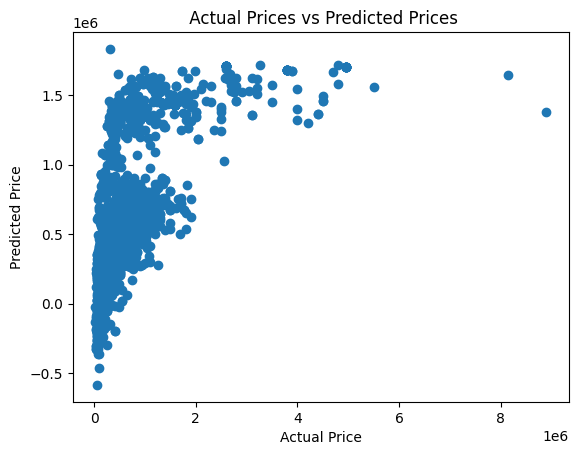

In [86]:
plt.scatter(y_train, predicted_data)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()